In [2]:
# import des librairie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import result_anova

2023-04-07 14:24:01.937268: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-07 14:24:02.024958: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-07 14:24:02.026362: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-07 14:24:02.973526: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## EDA 
L'objectif de cette étude est d'identifié les éléments nous permettant de répondre aux exigences du projet : Classification ayant pour cible, la satifaction du client. 


**Objectifs**
- Etude des corrélations (quantitative/quantitative, quantitative/quanlitative, qualitative/qualitative)
- Analyse du dataset
- Analyse des distributions
- Présence de valeurs hors normes

**Hypothèses a priori**
- la satisfaction est dépandente des variables décrivant les expérience du client
  - Propreté (Cleanliness)
  - Comport du siège (Seat_comfort)
  - Service en ligne (ensemble de feature relatif aux services en ligne)
  - la prise en charge des baggage (Baggage_handling)
  - Retard : influence négative sur la satisfiction
- Au contraire les variables exogène à l'expérience client devraient démeurer peu importantes
  - Age
  - Genre
  - type de client(Customer_type), bien qu'un client fidèle aurait plus de chance d'être satisfait, cela n'explique pas pourquoi il l'est
  - id
  - class

In [3]:
from utils import clean_columns
df = pd.read_csv('https://raw.githubusercontent.com/remijul/dataset/master/Airline%20Passenger%20Satisfaction.csv', sep=';')
df = clean_columns(df)
df.shape

(129880, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Satisfaction                       129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer_Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type_of_Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight_Distance                    129880 non-null  int64  
 8   Seat_comfort                       129880 non-null  int64  
 9   Departure_Arrival_time_convenient  129880 non-null  int64  
 10  Food_and_drink                     129880 non-null  int64  
 11  Gate_location                      1298

In [5]:
df.describe()

,id,Age,Flight_Distance,Seat_comfort,Departure_Arrival_time_convenient,Food_and_drink,Gate_location,Inflight_wifi_service,Inflight_entertainment,Online_support,Ease_of_Online_booking,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,37493.270818,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,1.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,97410.250000,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


**Observation** : 
- les notes moyennes des features sont comprises entre 2.8 et 3,7 donc au dessus de la moyenne (2.5)
- la médianne est, quant à elle, comprise entre 3 et 4
- retard moyen de 15 minutes au départ comme à l'arrivé
- age moyen : 39 ans

In [6]:
def correlation(dataframe, method):
  liste = []
  corr = dataframe.corr(method = method)
  colonnesIndex = corr.index
  colonnesNoms = corr.columns
  for colonne in colonnesIndex:
    for colonne2 in colonnesNoms:
      if colonne != colonne2:
        trie = [colonne, colonne2]
        trie.sort()
        liste.append([trie[0], trie[1], corr.loc[colonne, colonne2]])
  return pd.DataFrame(liste, columns=["col1", "col2", "values"]).drop_duplicates(["col1", "col2"]).sort_values(by='values', ascending=False)

In [7]:
from utils import get_fill_ratio
get_fill_ratio(80, df)

Nombre de colonne(s) remplie a 80% : 24
Arrival_Delay_in_Minutes : 99.7
Online_boarding : 100.0
Cleanliness : 100.0
Checkin_service : 100.0
Baggage_handling : 100.0
Leg_room_service : 100.0
On_board_service : 100.0
Ease_of_Online_booking : 100.0
Online_support : 100.0
Inflight_entertainment : 100.0
Inflight_wifi_service : 100.0
id : 100.0
Food_and_drink : 100.0
Departure_Arrival_time_convenient : 100.0
Seat_comfort : 100.0
Flight_Distance : 100.0
Class : 100.0
Type_of_Travel : 100.0
Age : 100.0
Customer_Type : 100.0
Gender : 100.0
Satisfaction : 100.0
Departure_Delay_in_Minutes : 100.0
Gate_location : 100.0


Index(['Arrival_Delay_in_Minutes', 'Online_boarding', 'Cleanliness',
       'Checkin_service', 'Baggage_handling', 'Leg_room_service',
       'On_board_service', 'Ease_of_Online_booking', 'Online_support',
       'Inflight_entertainment', 'Inflight_wifi_service', 'id',
       'Food_and_drink', 'Departure_Arrival_time_convenient', 'Seat_comfort',
       'Flight_Distance', 'Class', 'Type_of_Travel', 'Age', 'Customer_Type',
       'Gender', 'Satisfaction', 'Departure_Delay_in_Minutes',
       'Gate_location'],
      dtype='object')

In [8]:
df_num = df.select_dtypes(exclude=[object])
cor = correlation(df_num, 'pearson')
cor[cor['values'] >= 0.5].style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '20px'})
# affichage des correlation au delà de 0.5

,col1,col2,values
323,Arrival_Delay_in_Minutes,Departure_Delay_in_Minutes,0.965291
58,Food_and_drink,Seat_comfort,0.715997
195,Ease_of_Online_booking,Online_boarding,0.684320
177,Online_boarding,Online_support,0.669843
248,Baggage_handling,Cleanliness,0.631803
141,Inflight_wifi_service,Online_boarding,0.631786
171,Ease_of_Online_booking,Online_support,0.617489
135,Ease_of_Online_booking,Inflight_wifi_service,0.601100
134,Inflight_wifi_service,Online_support,0.557340
212,Cleanliness,On_board_service,0.551294


**Observation** : 
- Corrélation entre les différents services en ligne
- Corrélation entre la prise en charge des baggages et la propreté
- Corrélation entre la nourriture et la comfort du siège

In [9]:
# Anova
dfs = []
for col_cat in df.select_dtypes(include=[object]).columns:
    df_anova = result_anova(col_cat, df, seuil=0.05)
    dfs.append(df_anova)


In [10]:
print(f'length : {len(dfs)} dataframes')
dfs[0] # affiche l'anova sur la satisfaction

length : 5 dataframes


,Satisfaction,Colonne(s) numérique(s),Résultat Anova,P-value
0,Satisfaction,id,Il y a un lien,1.233296e-06
1,Satisfaction,Age,Il y a un lien,0.000000e+00
2,Satisfaction,Flight_Distance,Il y a un lien,4.569126e-45
3,Satisfaction,Seat_comfort,Il y a un lien,0.000000e+00
4,Satisfaction,Departure_Arrival_time_convenient,Il y a un lien,1.884204e-08
5,Satisfaction,Food_and_drink,Il y a un lien,0.000000e+00
6,Satisfaction,Gate_location,Il y a un lien,1.004567e-05
7,Satisfaction,Inflight_wifi_service,Il y a un lien,0.000000e+00
8,Satisfaction,Inflight_entertainment,Il y a un lien,0.000000e+00
9,Satisfaction,Online_support,Il y a un lien,0.000000e+00


**Observation** : 
- la satisfaction a un lien avec toute les variables quantitatives (même l'id)
- Certaines variables ont des p-values plus proches de 0 que d'autres, ce qui suggère une hiérarchie

In [11]:
from utils import chi2
for col_cat in df.select_dtypes(include=[object]).drop('Satisfaction', axis=1).columns:
    print(col_cat)
    chi2(df, 'Satisfaction', col_cat)

Gender
Il y a un lien entre les colonnes Satisfaction et Gender
La p-value vaut 0.0

Customer_Type
Il y a un lien entre les colonnes Satisfaction et Customer_Type
La p-value vaut 0.0

Type_of_Travel
Il y a un lien entre les colonnes Satisfaction et Type_of_Travel
La p-value vaut 0.0

Class
Il y a un lien entre les colonnes Satisfaction et Class
La p-value vaut 0.0



**Observation** : 
- La satisfaction est liée à toutes les variables qualitatives

In [12]:
[print(f"{col} : {df[col].unique()}") for col in df.select_dtypes(include=[object]).columns]

Satisfaction : ['satisfied' 'neutral or dissatisfied']
Gender : ['Female' 'Male']
Customer_Type : ['Loyal Customer' 'disloyal Customer']
Type_of_Travel : ['Personal Travel' 'Business travel']
Class : ['Eco' 'Business' 'Eco Plus']


[None, None, None, None, None]

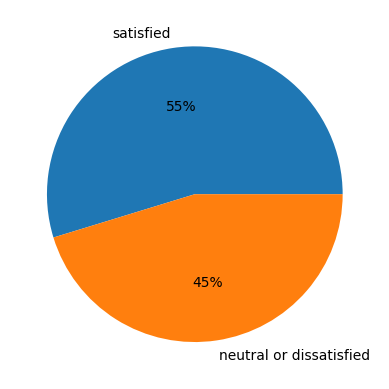

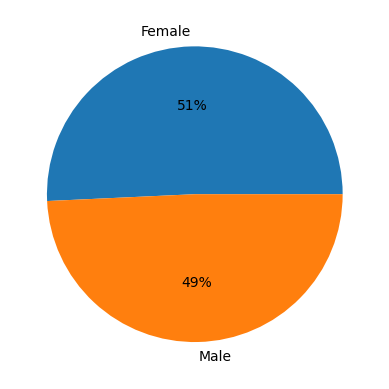

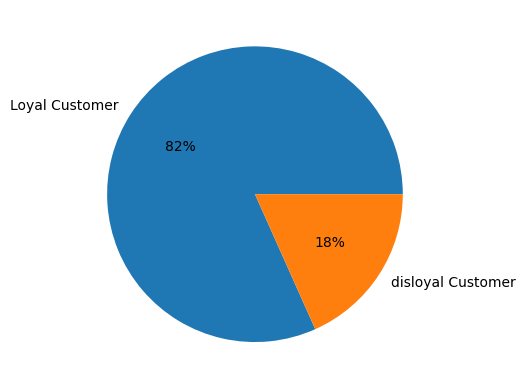

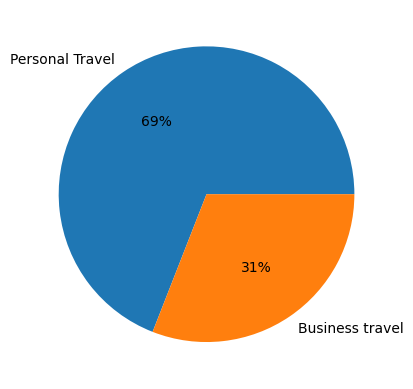

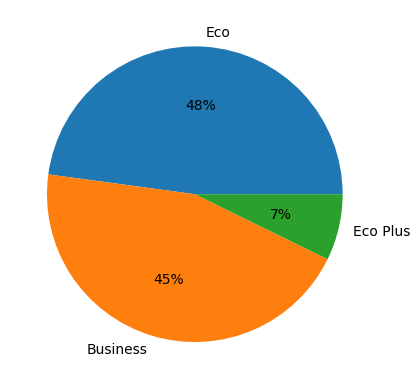

In [13]:
for col_cat in df.select_dtypes(include=[object]):
    plt.pie(df[col_cat].value_counts(), labels=df[col_cat].unique(), autopct='%.0f%%')
    plt.show()

**Observation** : 
- Les classes de la variable satisfaction sont légèrement déséquilibrées (55/45)
- Les classes de la variable customer sont déséquilibrées en faveur des clients fidèles, cela peut être source de biais pour le modèle
- La classe Eco plus est minoritaire dans la variable class, fusionner la classe Eco avec Eco plus peut être interresant pour du feature engineering
- Les classes de la variable type de voyages sont déséquilibrées en faveur des voyages personnels, ce qui est source de biais 

In [14]:
df.select_dtypes(exclude=[object]).columns

Index(['id', 'Age', 'Flight_Distance', 'Seat_comfort',
       'Departure_Arrival_time_convenient', 'Food_and_drink', 'Gate_location',
       'Inflight_wifi_service', 'Inflight_entertainment', 'Online_support',
       'Ease_of_Online_booking', 'On_board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes'],
      dtype='object')

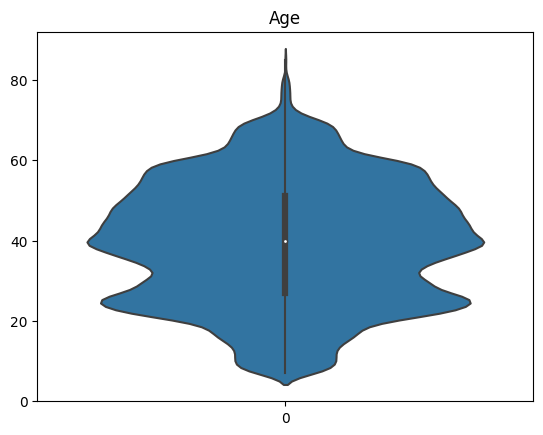

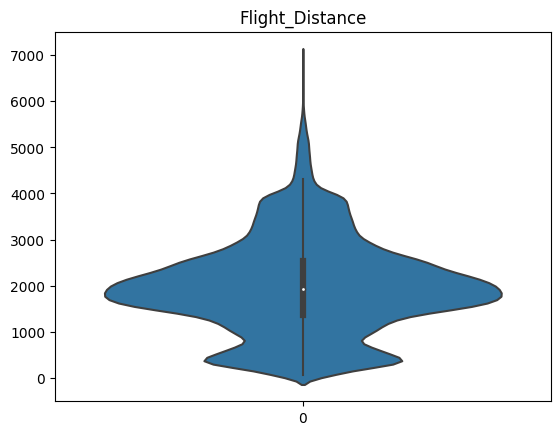

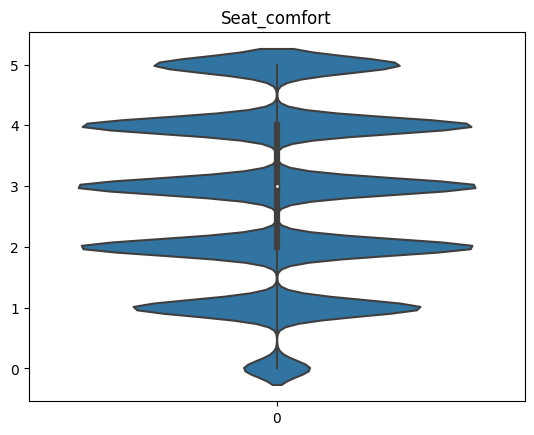

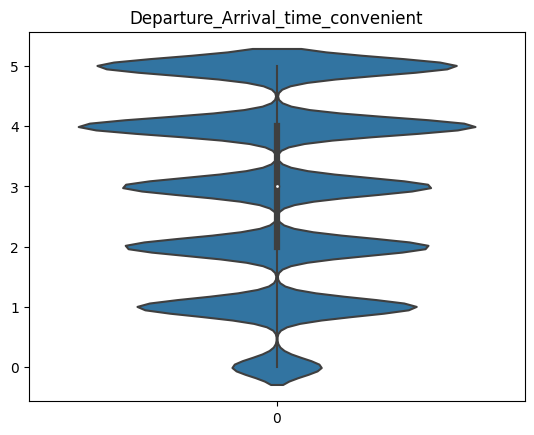

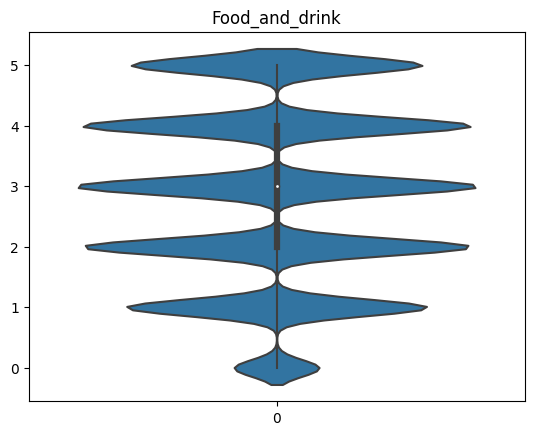

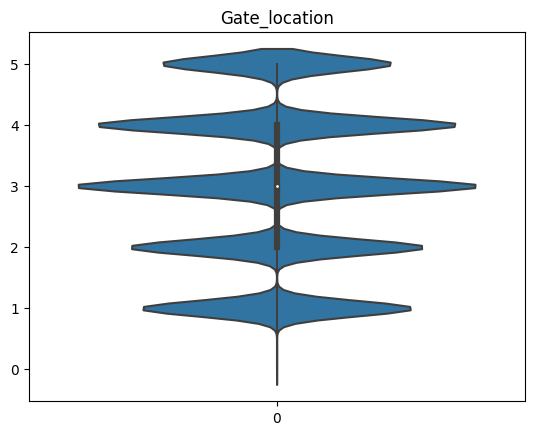

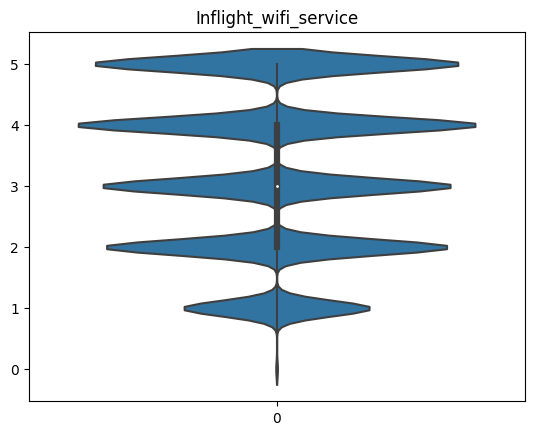

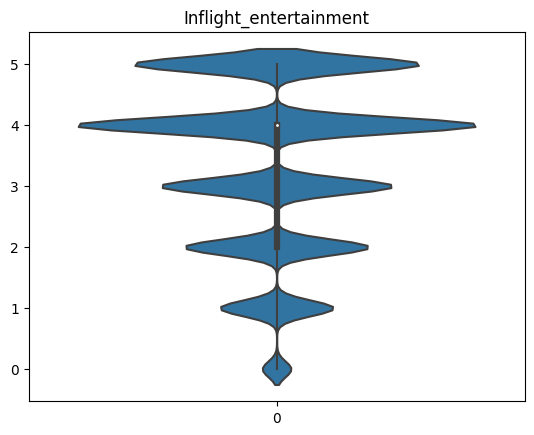

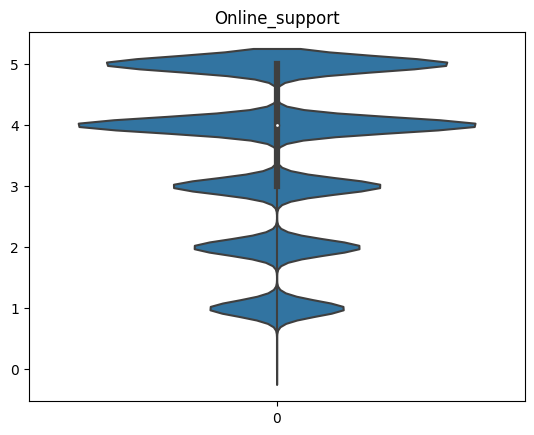

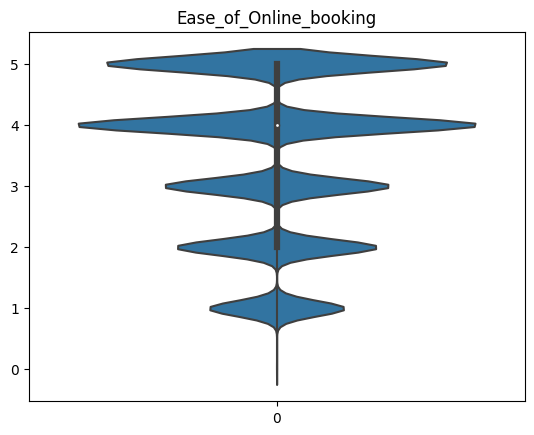

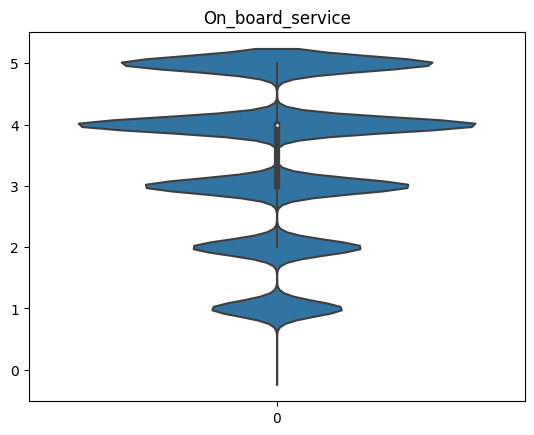

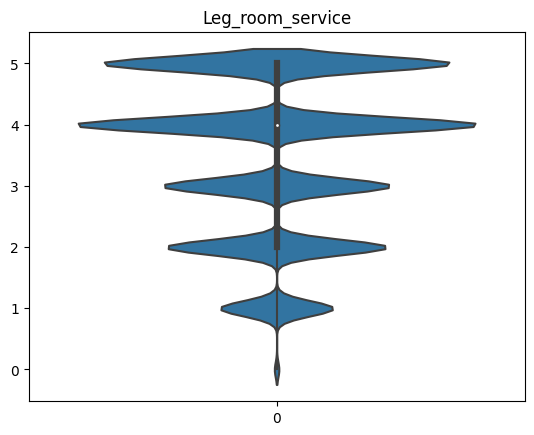

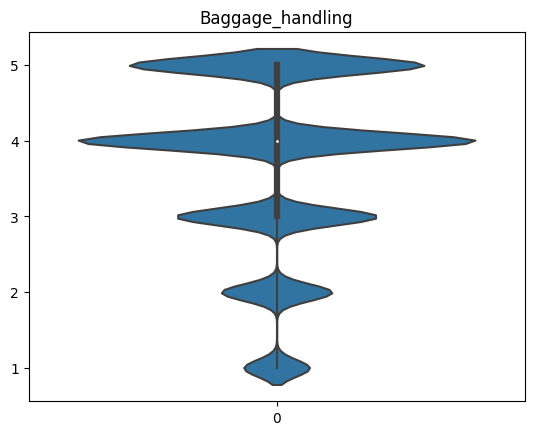

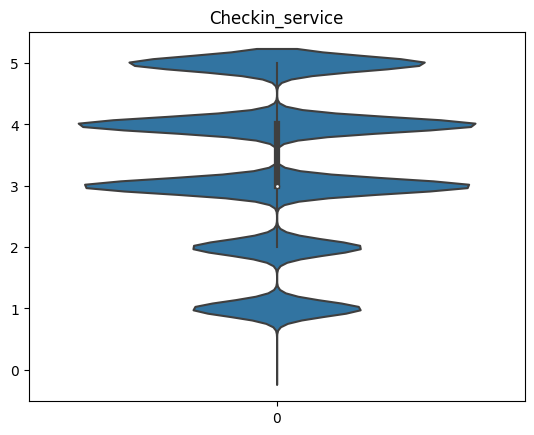

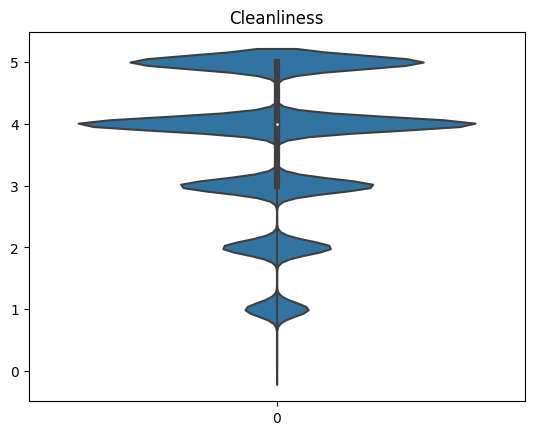

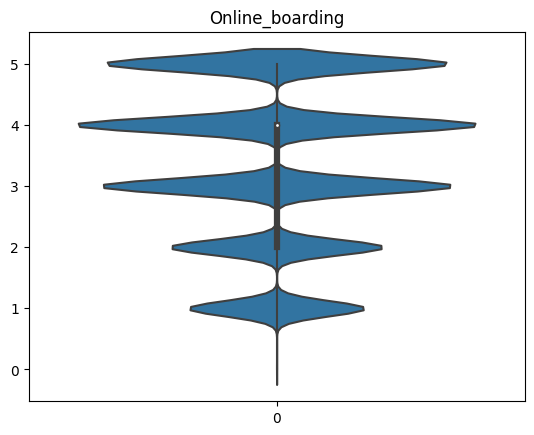

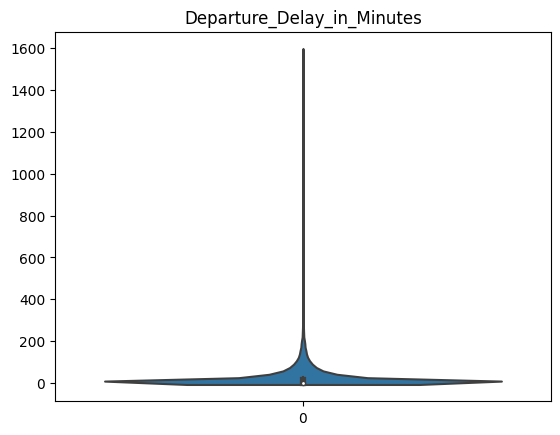

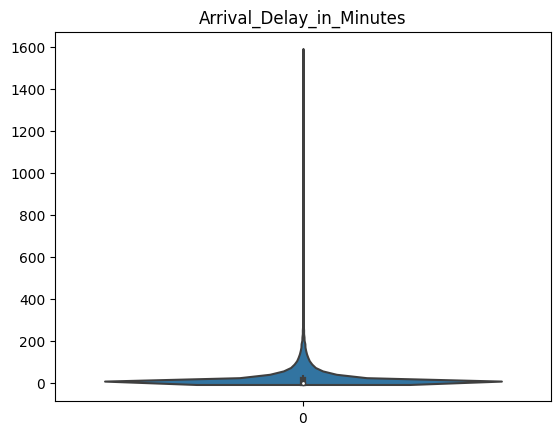

In [19]:
for col_num in df.select_dtypes(exclude=[object]).drop('id', axis=1).columns:
    plt.figure()
    sns.violinplot(df[col_num]).set(title=col_num)

**Observation** : 
- Distribution gaussienne sur la plupart des features
- Cas particulier pour les retard dont les valeurs au dessus de 0 sont des outliers, ce qui bon signe pour une companie aérienne

### Rapport final de l'EDA
#### Composition du dataset
- lignes : 129880
- colonnes : 24, (19 colonnes quantitatives, 5 colonnes qualitatives)
- taux de remplissage : tous les colonnes sont remplies à l'exception d'une seule présentant un taux de 99,7 %

#### Conclusions sur les corrélations
- L'ensemble des features sont corréllées à la satisfaction
- Le choix sera fait de ne pas retenir l'id car ce n'est pas un facteur permettant d'expliquer le degré de satisfaction d'un client
- Le dataset contient des valeurs manquantes (~0.3%), les retirer ne représente pas une perte de données significative